In [235]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Linear Regression

In this lab, we are going to continue to explore linear regression and introduce the concept of regularisation, specifically, Ridge Regression, Lasso and Elastic Net.



### Load the housing dataset

Using pandas, load the following dataset (available in eclass, taken from http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html):

**Housing.txt:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

This dataset was also pre-processed and scaled.

In [236]:
housing_df = pd.read_csv('housing.csv')
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


In [237]:
X = housing_df.values[:,:-1]
y = housing_df['MEDV']

### Let's split the data into training, validation and testing. 80% training, 10% validation and 10% testing.

In [238]:
# your code goes here:
x_train, x_rest, y_train, y_rest = train_test_split(X, y, test_size = 0.2)
x_valid, x_test, y_valid, y_test = train_test_split(x_rest, y_rest, test_size = 0.5)

# Part I - Ridge Regression

Now you will write code that implements Ridge Regression using the closed form from the slides.

In [239]:
def ridge_regression(x, y, la, apply_bias = True):
    # your code goes here:
    
    if apply_bias:
        x = np.insert(x, 0, 1, axis=1) # Applies a bias column to our features
    
    return np.dot(np.dot(np.linalg.inv((la * np.identity(x.shape[1])) + np.dot(x.transpose(), x)), x.transpose()), y)

Test different values of $\lambda$ on the validation set and choose the one that gives the best RMSE.

In [240]:
# your code goes here:
rmse_train = []
rmse_valid = []
la_range = []

for la in np.linspace(0, 2, 20):
    w = ridge_regression(x_train, y_train, la, apply_bias=False)
    
    pred_train = np.dot(x_train, w)
    pred_valid = np.dot(x_valid, w)
    
    rmse_train.append(mean_squared_error(y_train, pred_train, squared=False))
    rmse_valid.append(mean_squared_error(y_valid, pred_valid, squared=False))
    la_range.append(la)

Plot the RMSE of the validation and training sets at different values of $\lambda$. 

Try: 20 points in the interval $\lambda \in [0,2]$

Your plot should like the one below.

Best Lambda:  0.42105263157894735


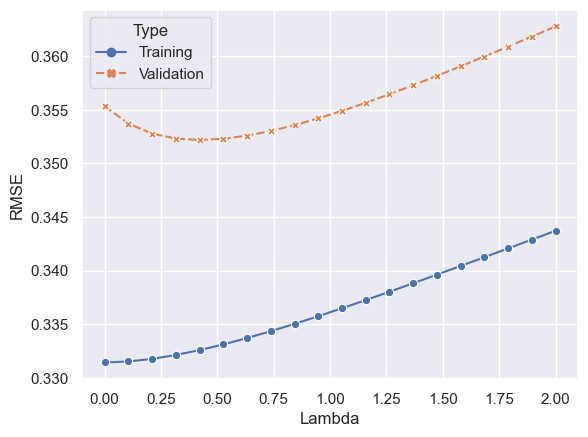

In [243]:
# your code goes here:
df = pd.DataFrame({"Lambda": la_range, "Training": rmse_train, "Validation": rmse_valid})
plotting_df = df.melt("Lambda", var_name="Type", value_name="RMSE")
sns.lineplot(data=plotting_df, x="Lambda", y="RMSE", hue="Type", style="Type", markers=True)

best_la = la_range[np.array(rmse_valid).argmin()]
print("Best Lambda: ", best_la)

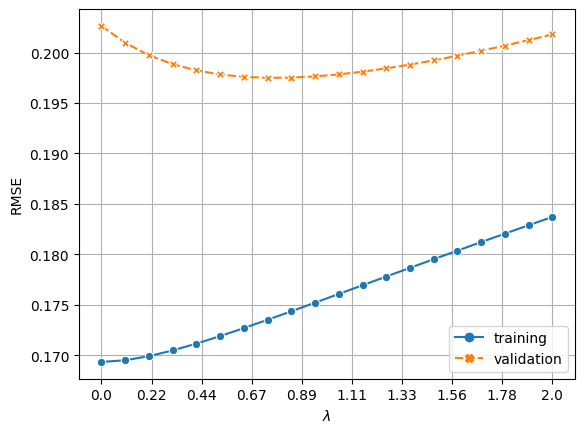

In [104]:
## leave this cell untouched to see how the plot should look like
## Ok <3

Now, after selecting the best $\lambda$ based on the plot above, report the RMSE of the testing set.

Don't forget to use the whole training set (train+validation) to train a model with the best value of $\lambda$.

In [250]:
# your code goes here:
best_x = np.vstack((x_train, x_valid))
best_y = np.vstack((np.asarray(y_train).reshape(-1,1), np.asarray(y_valid).reshape(-1,1)))

best_w = ridge_regression(best_x, best_y, best_la, apply_bias=False)

best_predict = np.dot(x_test, best_w)
best_rmse = mean_squared_error(y_test, best_predict, squared=False)
print("RMSE with the best lambda =", best_rmse)

RMSE with the best lambda = 0.31353563615217683


# Part II - Lasso

Now you will implement Lasso regression, but using the scikit-learn implementation to learn the weights.

You will still use the same training/validation/testing folds as in Part I

The l1 term is controlled by the alpha parameter in the scikit-learn implementation of Lasso.

In [252]:
# The general way of using the Lasso implementation (or any other classifier/regressor) of scikit-learn is as follows:
# Make sure to replace X, y, and X_val with your training set variables!
alpha_value = 0.1
lasso_regression = Lasso(alpha=alpha_value).fit(x_train, y_train)
y_predict_lasso_reg = lasso_regression.predict(x_valid)
y_predict_lasso_reg

array([3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298, 3.08765298, 3.08765298, 3.08765298, 3.08765298,
       3.08765298])

### The goal here is to again find a good value of alpha for the RMSE in the validation set. 
Experiment with some different values, generate the same plot as Part I, and report the RMSE of testing set after selecting the best alpha from the validation set.

C:\Users\georg\AppData\Local\Temp\ipykernel_6432\4231575519.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_regression = Lasso(alpha=al).fit(x_train, y_train)
c:\Users\georg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\georg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.776e+00, tolerance: 5.522e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skle

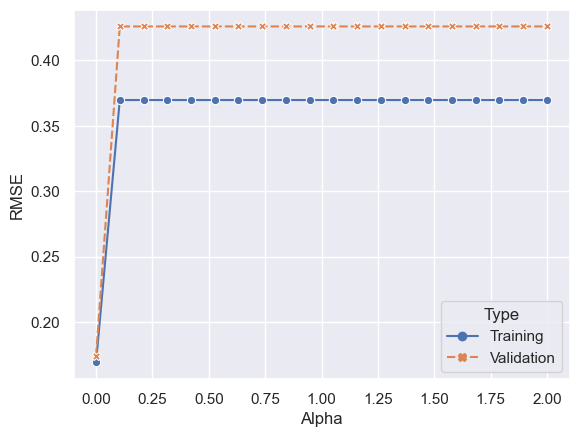

In [268]:
# your code goes here:
rmse_train2 = []
rmse_valid2 = []
al_range = []

# Taking all alpha's RMSE
for al in np.linspace(0, 2, 20):
    lasso_regression = Lasso(alpha=al).fit(x_train, y_train)
    
    predict_lasso_training = lasso_regression.predict(x_train)
    predict_lasso_valid = lasso_regression.predict(x_valid)
    
    rmse_train2.append(mean_squared_error(y_train, predict_lasso_training, squared=False))
    rmse_valid2.append(mean_squared_error(y_valid, predict_lasso_valid, squared=False))
    al_range.append(al)

# Plotting RMSE x Alphas
df_lasso = pd.DataFrame({"Alpha": al_range, "Training": rmse_train2, "Validation": rmse_valid2})
plotting_lasso = df_lasso.melt("Alpha", var_name="Type", value_name="RMSE")
sns.lineplot(data=plotting_lasso, x="Alpha", y="RMSE", hue="Type", style="Type", markers=True)

# Taking the best Alpha and calculating it's RMSE
best_al = al_range[np.array(rmse_valid2).argmin()]

lasso_regression = Lasso(alpha=best_al).fit(best_x, best_y)
best_predict_lasso = lasso_regression.predict(x_test)

best_rmse2 = mean_squared_error(y_test, best_predict_lasso, squared=False)

In [267]:
print("Best Alpha: ", best_al)
print("RMSE with the best alpha =", best_rmse2)

Best Alpha:  0.0
RMSE with the best alpha = 0.20906812114953507


# Part III Elastic Net

Now let's combine both ridge and lasso and implement Elastic Net Regression, again we'll use the sklearn implementation.

Following the guidelines from Part II, implement Elastic Net using the sklearn implementation ElasticNet()

I strongly advise you to read the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

For simplicity here, let's apply the best $\lambda$ of Part I and the best alpha from Part II and train an Elastic Net model and report the testing set RMSE.

In [269]:
# your coude goes here:
elastic_net = ElasticNet(alpha=best_la + best_al, l1_ratio=(best_al)/(best_al+best_la)).fit(best_x, best_y)
elastic_predict = elastic_net.predict(x_test)
elastic_rmse = mean_squared_error(y_test, elastic_predict, squared=False)
print("Elastic Net RMSE with best Alpha and best Lambda = ", elastic_rmse)

Elastic Net RMSE with best Alpha and best Lambda =  0.4250853057309345


c:\Users\georg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.688e+01, tolerance: 6.447e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
